In [133]:
import sys     
import math
import datetime
import calendar
import os                            
import pandas as pd                  
import matplotlib.pyplot as plt      
import seaborn as sns     
import altair as alt
import numpy as np
%matplotlib inline

# jupyter notebook needs this option.
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [134]:
dataurl = 'https://data.bloomington.in.gov/dataset/94d3f457-57b5-45be-bee0-a0106f59b7ed/resource/8854ce02-e8f5-44b9-b85f-17f002a7d023/download/8854ce02-e8f5-44b9-b85f-17f002a7d023.csv'
df = pd.read_csv(dataurl)
df['count'] = 1


In [135]:
df[0:10]['animalage']

0    8 years 6 months.
1    8 years 5 months.
2    5 years 9 months.
3    8 years 3 months.
4    5 years 2 months.
5    5 years 2 months.
6    3 years 9 months.
7    3 years 9 months.
8    2 years 5 months.
9    2 years 5 months.
Name: animalage, dtype: object

In [136]:
df.sexname.value_counts()

Female     2017
Male       1999
Unknown     115
Name: sexname, dtype: int64

In [137]:
df.head()

id           intakedate  intakereason  istransfer sheltercode  \
0  15801  2009-11-28 00:00:00        Moving           0   C09115463   
1  15932  2009-12-08 00:00:00        Moving           0   D09125594   
2  28859  2012-08-10 00:00:00     Abandoned           0   D12082309   
3  30812  2013-01-11 00:00:00     Abandoned           0    C1301091   
4  31469  2013-03-26 00:00:00  Incompatible           0    D1303720   

  identichipnumber   animalname                breedname  \
0       0A115D7358       Jadzia      Domestic Short Hair   
1       0A11675477        Gonzo  German Shepherd Dog/Mix   
2       0A13253C7B       Maggie  Shep Mix/Siberian Husky   
3       0A13403D4D  Pretty Girl      Domestic Short Hair   
4  981020007006095       Bonnie              Basenji/Mix   

             basecolour speciesname  ...  movementtype istrial  \
0                Tortie         Cat  ...      Adoption     0.0   
1                   Tan         Dog  ...      Adoption     0.0   
2               Various         Dog  ...      Adoption     0.0   
3  Dilute tortoiseshell         Cat  ...        Foster     0.0   
4       Brown and White         Dog  ...      Adoption     0.0   

            returndate returnedreason deceaseddate  deceasedreason  \
0                  NaN          Stray          NaN    Died in care   
1                  NaN          Stray          NaN    Died in care   
2                  NaN          Stray          NaN    Died in care   
3                  NaN          Stray          NaN    Died in care   
4  2017-05-08 00:00:00   Incompatible          NaN    Died in care   

  diedoffshelter puttosleep isdoa count  
0              0          0     0     1  
1              0          0     0     1  
2              0          0     0     1  
3              0          0     0     1  
4              0          0     0     1  

[5 rows x 24 columns]

# Animal Counts by Sex

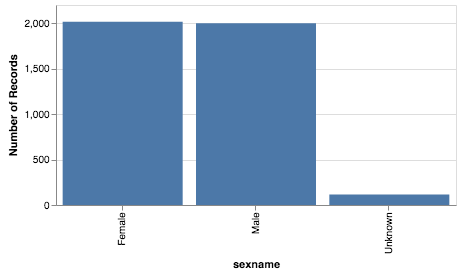

In [138]:
chart = alt.Chart(df).mark_bar().encode(
    x=alt.X('sexname'),
    y='count()'
)
chart.properties(height=200, width=400)


# Animal Counts by Species

In [139]:
df['speciesname'].value_counts()

Cat             2204
Dog             1642
Rabbit            92
Rat               84
Guinea Pig        41
Bird              14
Gerbil            10
Chicken            6
Opossum            6
Ferret             6
Goat               4
Lizard             2
Snake              2
Turtle             2
Hamster            2
Bat                2
Hedgehog           2
Sugar Glider       2
Tortoise           2
Pig                2
Tarantula          1
Squirrel           1
Chinchilla         1
Mouse              1
Name: speciesname, dtype: int64

Text(0.5,1,'Species Count')

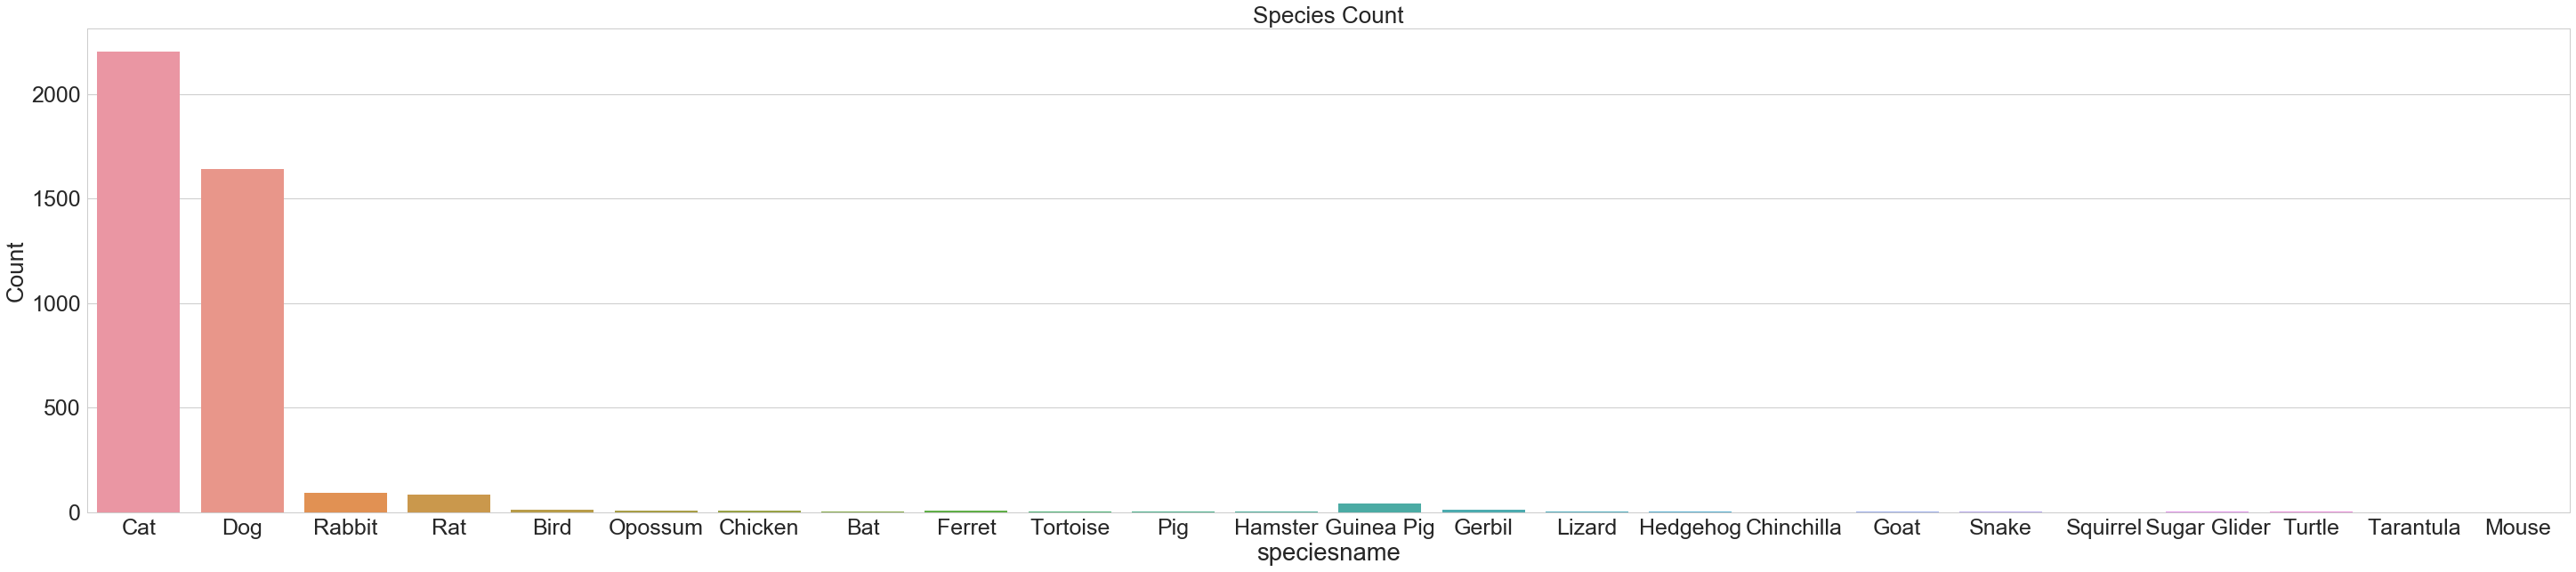

In [140]:
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=2.5, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(50,10))
speciescount = sns.countplot(x="speciesname", data=df)
plt.ylabel('Count', fontsize=26)
plt.title('Species Count', fontsize=26)


# Intake Analysis
**WordCloud** on intake reasons to understand what is the most popular reason for an intake.

*Help from Austin Animal shelter data analysis*

In [141]:
import spacy
import wordcloud
from collections import Counter

nlp = spacy.load('en')

In [142]:
df = df.dropna(subset=['intakereason'])

In [143]:
intakereason_metamor = nlp(' '.join(df.intakereason))
words = [token.text for token in intakereason_metamor
         if token.is_stop != True and token.is_punct != True]

In [144]:
word_cnt = Counter(words)
wc = wordcloud.WordCloud(width=1000, height=500)
wc.generate_from_frequencies(word_cnt)

(-0.5, 999.5, 499.5, -0.5)

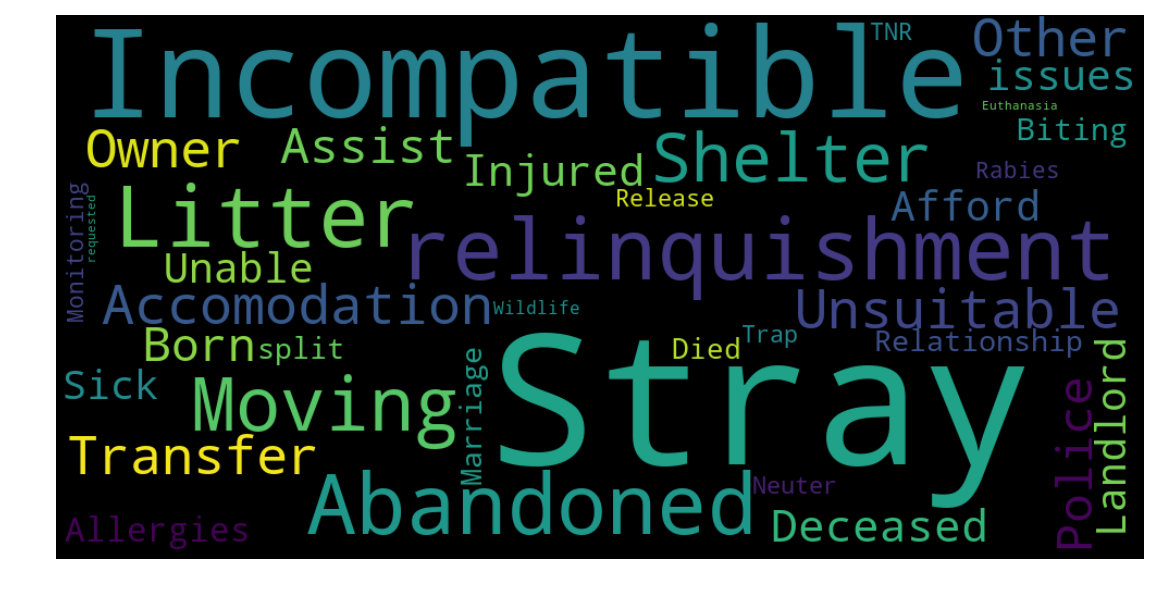

In [145]:
plt.figure(figsize=(20,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

Lets look at the counts for various intake reasons - stray, moving, injured etc.


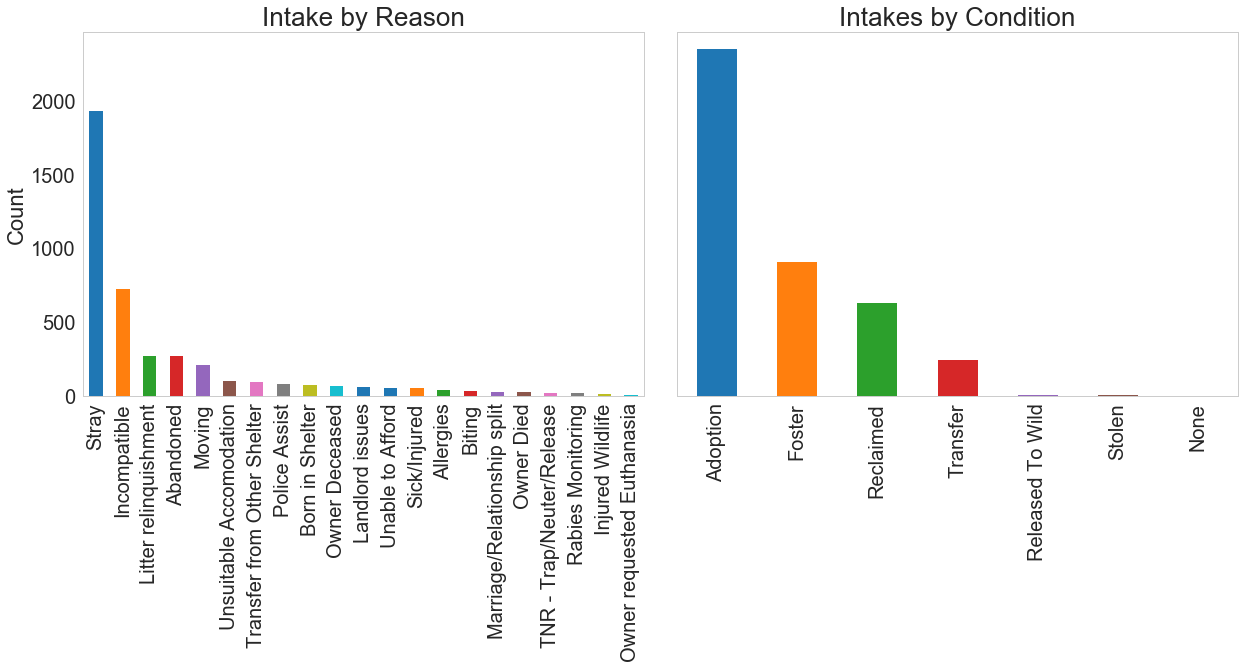

In [146]:
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(18,10),sharey=True)
sns.set_style("whitegrid",{"axes.grid": False})


p1 = df['intakereason'].value_counts().plot(kind='bar', fontsize=20, ax=ax1)
p1.set_ylabel('Count', fontsize=22)
p1.set_title('Intake by Reason', fontsize=26)

p2 = df['movementtype'].value_counts().plot(kind='bar', fontsize=20, ax=ax2)
p2.set_ylabel('Count', fontsize=22)
p2.set_title('Intakes by Condition', fontsize=26)

plt.tight_layout()


In [147]:
# Animal age
def map_animal_age(df,animalage):
    df = df.loc[df.loc[:, animalage] != 'NULL']
    
    range_column =  'animalage_Period Range'
    
    df['animalage_Periods'], df[range_column] = df.loc[:, animalage].str.split(' ').str[0].fillna(0).astype(int), df.loc[:, animalage].str.split(' ').str[1].fillna(0)
    
    
    df[range_column] = np.where(df[range_column].str.contains('day'), 1, 
                                  np.where(df[range_column].str.contains('week'), 7, 
                                           np.where(df[range_column].str.contains('month'), 30, 
                                np.where(df[range_column].str.contains('year'), 365, 0)))).astype(int)

    df[animalage + '_(days)'] = df[range_column] * df[animalage + '_Periods']
    df[animalage + '_(years)'] = df[animalage + '_(days)'] / 365
    df[animalage + '_age_group'] = pd.cut(df[animalage + '_(years)'], 10)
    return df


In [148]:
df = map_animal_age(df,'animalage')

Text(0.5,1,'Intake Animal Age Range in Years')

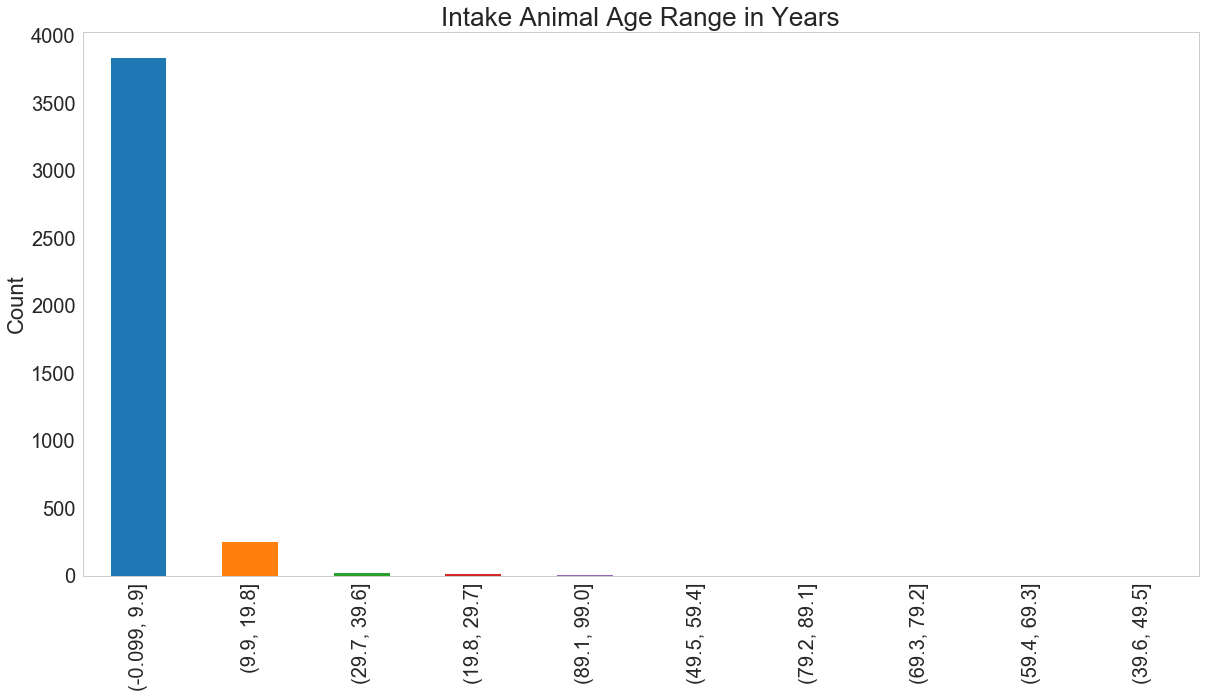

In [149]:
plt.figure(figsize=(20,10))
plot = df['animalage_age_group'].value_counts().plot(kind='bar', fontsize=20)
plot.set_ylabel('Count', fontsize=22)
plot.set_title('Intake Animal Age Range in Years', fontsize=26)

**Number** of animals by sex - approximately same number of male and female

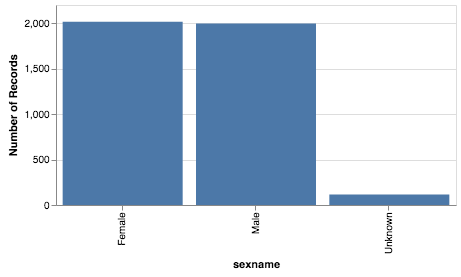

In [150]:
chart = alt.Chart(df).mark_bar().encode(
    x=alt.X('sexname'),
    y='count()'
)
chart.properties(height=200, width=400)


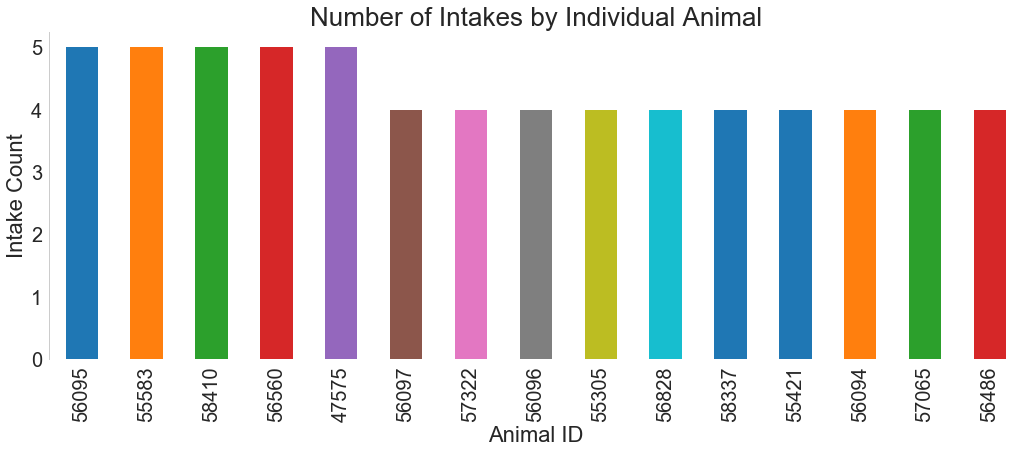

In [151]:
animal_intakes = df['id'].value_counts()[0:15].plot(kind='bar', 
                                                                   fontsize=20,
                                                                   figsize=(15, 7))

animal_intakes.set_ylabel('Intake Count', fontsize=22)
animal_intakes.set_xlabel('Animal ID', fontsize=22)
animal_intakes.set_title('Number of Intakes by Individual Animal', fontsize=26)

plt.tight_layout()
sns.despine(bottom=True)

In [152]:
count = np.arange(2, 9)
intake_cnt = []
intake_text = []

for i in count:
    if i !=8:
        intakes = df['id'].value_counts() == i
        intake_name.append(str(i) + ' Intakes')
    else:
        intakes = df['id'].value_counts() >= i
        intake_name.append(str(i) + ' or More Intakes')
    
    intake_count.append(intakes.sum())
    

In [153]:
intake_name

['2 Intakes',
 '3 Intakes',
 '4 Intakes',
 '5 Intakes',
 '6 Intakes',
 '7 Intakes',
 '8 or Greater Intakes',
 '2 Intakes',
 '3 Intakes',
 '4 Intakes',
 '5 Intakes',
 '6 Intakes',
 '7 Intakes',
 '8 or More Intakes',
 '2 Intakes',
 '3 Intakes',
 '4 Intakes',
 '5 Intakes',
 '6 Intakes',
 '7 Intakes',
 '8 or More Intakes',
 '2 Intakes',
 '3 Intakes',
 '4 Intakes',
 '5 Intakes',
 '6 Intakes',
 '7 Intakes',
 '8 or More Intakes']

In [154]:
pd.DataFrame({'count': intake_count}, index=intake_name)


count
2 Intakes               693
3 Intakes               144
4 Intakes                29
5 Intakes                 5
6 Intakes                 0
7 Intakes                 0
8 or Greater Intakes      0
2 Intakes               693
3 Intakes               144
4 Intakes                29
5 Intakes                 5
6 Intakes                 0
7 Intakes                 0
8 or More Intakes         0
2 Intakes               693
3 Intakes               144
4 Intakes                29
5 Intakes                 5
6 Intakes                 0
7 Intakes                 0
8 or More Intakes         0
2 Intakes               693
3 Intakes               144
4 Intakes                29
5 Intakes                 5
6 Intakes                 0
7 Intakes                 0
8 or More Intakes         0

In [155]:
# Intake by sex and animal type

intake_animal_type_sex = df.groupby(['speciesname', 'sexname'])['count'].sum().reset_index()
intake_animal_type_sex


speciesname  sexname  count
0            Bat  Unknown      2
1           Bird     Male      3
2           Bird  Unknown     11
3            Cat   Female   1150
4            Cat     Male   1001
5            Cat  Unknown     52
6        Chicken   Female      4
7        Chicken     Male      1
8        Chicken  Unknown      1
9     Chinchilla     Male      1
10           Dog   Female    749
11           Dog     Male    878
12           Dog  Unknown     15
13        Ferret     Male      4
14        Ferret  Unknown      2
15        Gerbil   Female      7
16        Gerbil     Male      2
17        Gerbil  Unknown      1
18          Goat   Female      1
19          Goat     Male      3
20    Guinea Pig   Female     21
21    Guinea Pig     Male     20
22       Hamster   Female      1
23       Hamster     Male      1
24      Hedgehog  Unknown      2
25        Lizard   Female      1
26        Lizard  Unknown      1
27         Mouse     Male      1
28       Opossum  Unknown      6
29           Pig   Female      1
30           Pig     Male      1
31        Rabbit   Female     47
32        Rabbit     Male     43
33        Rabbit  Unknown      1
34           Rat   Female     33
35           Rat     Male     38
36           Rat  Unknown     13
37         Snake  Unknown      2
38      Squirrel  Unknown      1
39  Sugar Glider   Female      2
40     Tarantula  Unknown      1
41      Tortoise  Unknown      2
42        Turtle  Unknown      2

In [156]:
# plotting dogs and cats
intake_animal_type_sex = intake_animal_type_sex.loc[(intake_animal_type_sex['speciesname'] == 'Dog') | 
                                      (intake_animal_type_sex['speciesname'] == 'Cat')]
intake_animal_type_sex


speciesname  sexname  count
3          Cat   Female   1150
4          Cat     Male   1001
5          Cat  Unknown     52
10         Dog   Female    749
11         Dog     Male    878
12         Dog  Unknown     15

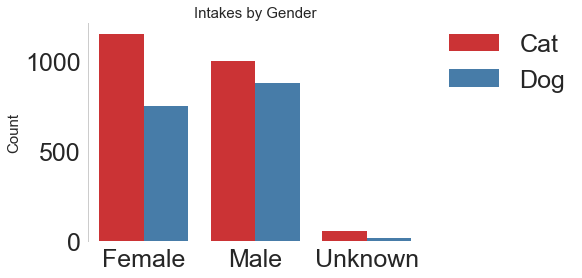

In [157]:
bar = sns.barplot(x='sexname', y='count', hue='speciesname', data=intake_animal_type_sex, 
                 palette=sns.color_palette("Set1"))


bar.set_title('Intakes by Gender', fontsize=15)
bar.set_ylabel('Count', fontsize=15)
bar.axes.xaxis.label.set_visible(False)
bar.xaxis.labelpad = 10
sns.despine(bottom=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


In [161]:

df['incomingmonth'] = pd.DatetimeIndex(df.intakedate).strftime("%B")
df.sort_values(by='incomingmonth',inplace=True)
intake_animal_type_month = df.groupby(['speciesname', 'incomingmonth'])['count'].sum().reset_index()
intake_animal_type_month

intake_animal_type_month = intake_animal_type_month.loc[(intake_animal_type_month['speciesname'] == 'Dog') | 
                                      (intake_animal_type_month['speciesname'] == 'Cat')]

intake_animal_type_month.sort_values(by='incomingmonth')

speciesname incomingmonth  count
9          Cat         April    188
26         Dog         April    144
10         Cat        August    229
27         Dog        August    140
11         Cat      December    101
28         Dog      December    116
12         Cat      February     82
29         Dog      February    130
13         Cat       January    110
30         Dog       January    100
31         Dog          July    154
14         Cat          July    310
32         Dog          June    126
15         Cat          June    313
33         Dog         March    219
16         Cat         March    161
34         Dog           May    132
17         Cat           May    164
35         Dog      November     95
18         Cat      November    108
36         Dog       October    161
19         Cat       October    204
20         Cat     September    233
37         Dog     September    125

Text(0.5,1,'Species by incoming month')

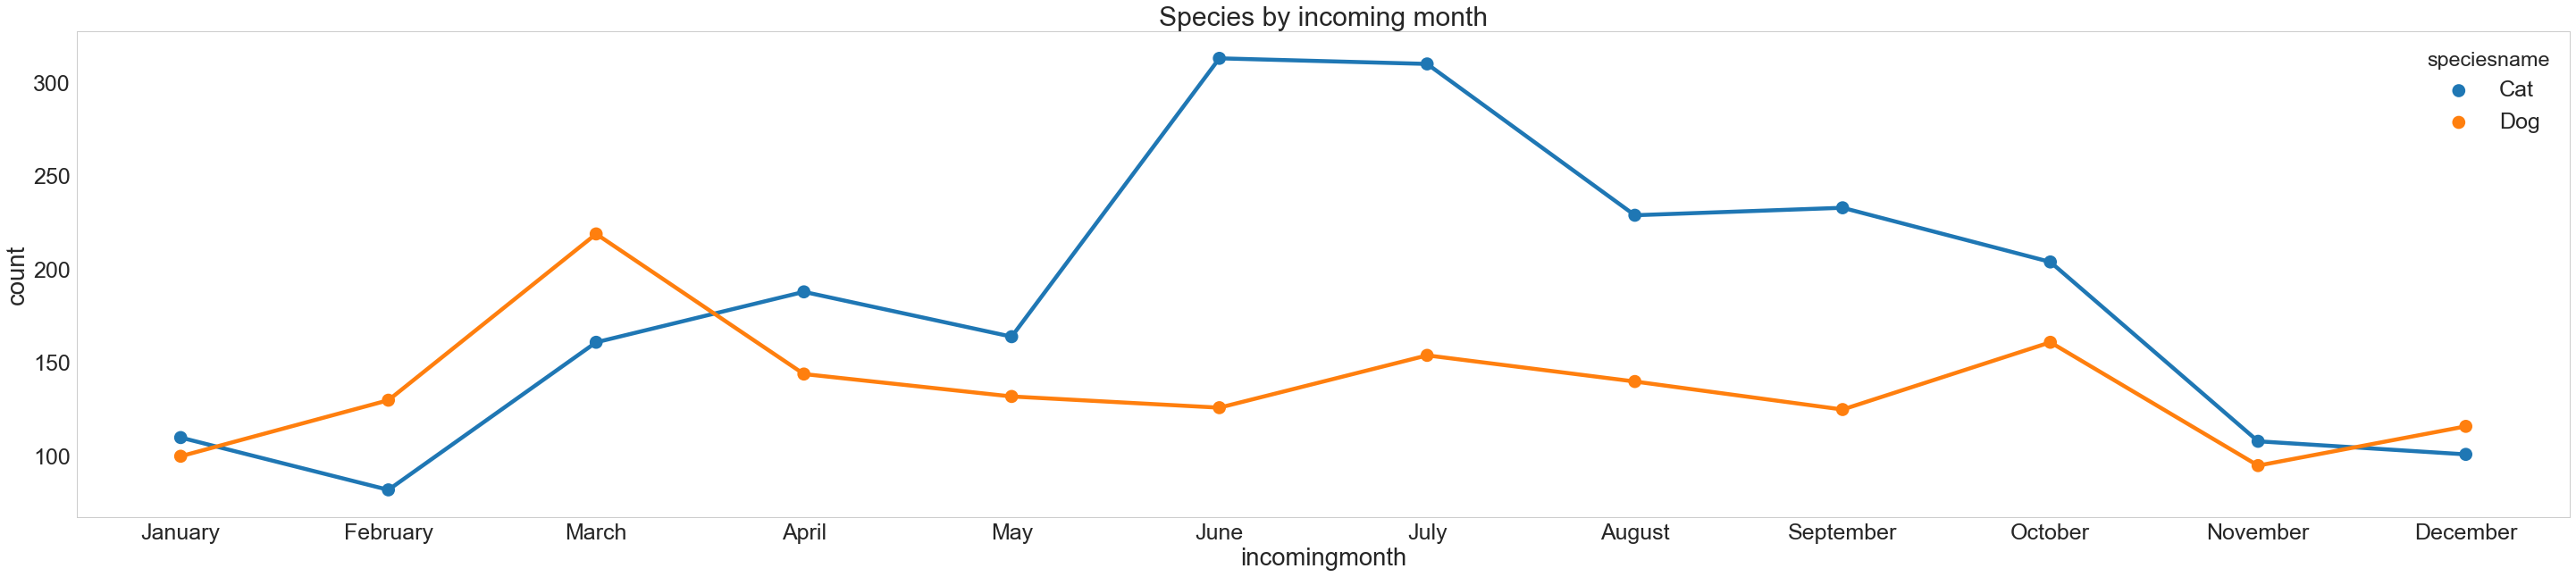

In [162]:
plt.figure(figsize=(50,10))

sns.pointplot(x = "incomingmonth", y = "count", data = intake_animal_type_month, 
              hue = "speciesname", order=['January','February','March','April','May','June','July','August','September','October','November','December'])
plt.title('Species by incoming month')